# Plot netCDF with cartopy
**plot netcCDF**: https://www.youtube.com/watch?v=r5m_aU5V6oY&t=1s

**cartopy**: https://www.youtube.com/watch?v=4M2aiHvhr5Y

**крутая статья))**: https://newtechaudit.ru/vizualiziruj-audiruj-cartopy/


По типу проецирования Map projections можно разделить на:
- азимутальные
- конические
- цилиндрические
- псевдо-проекции

Главные проекции в cartopy:
- *Plate-Carree* (для ценителей плоской Земли) 
- *Orthographic* (для «шарящих»)

In [10]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
# data = nc.Dataset(r'/home/voland/Documents/NetCdf4/data/1962.nc')
# data
data_path = '/home/voland/Documents/NetCdf4/data/1962.nc'
xrds = xr.open_dataset(data_path)

lats = xrds['lat'].values
lons = xrds['lon'].values
time = xrds['time'].values
tave = xrds['tave'].values

max(lats)

np.float64(54.875)

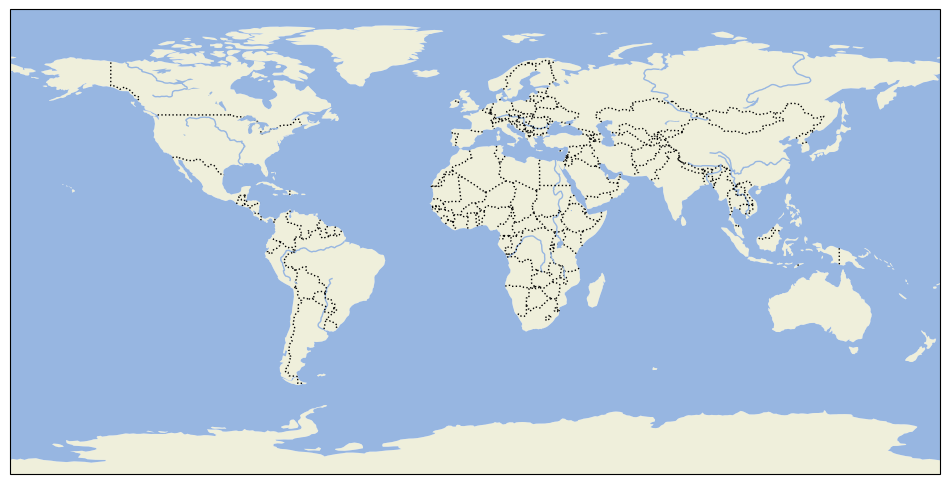

In [6]:
plt.figure(figsize=(12,12))
mp = plt.axes(projection=ccrs.PlateCarree())

mp.add_feature(cfeature.LAND)
mp.add_feature(cfeature.OCEAN)
mp.add_feature(cfeature.RIVERS)
mp.add_feature(cfeature.BORDERS, linestyle=':')
mp.add_feature(cfeature.LAKES)

# mp.coastlines()

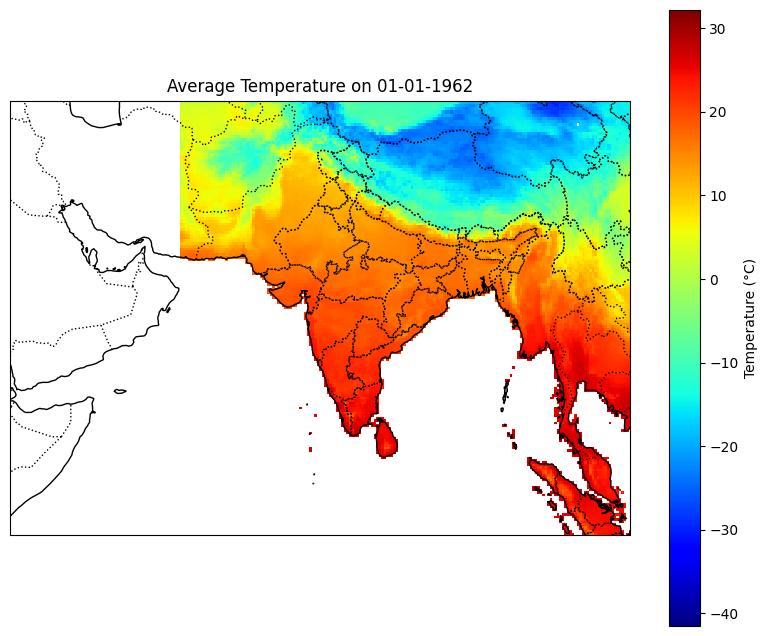

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([42.8, 105.37, -2, 38.78], crs=ccrs.PlateCarree())
# Добавление географических объектов
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Построение температурного поля
mesh = ax.pcolormesh(
    lons, 
    lats, 
    np.squeeze(tave[0, :, :]), 
    cmap='jet', 
    transform=ccrs.PlateCarree()
)

# Добавление цветовой шкалы
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Temperature (°C)')

# Заголовок
plt.title('Average Temperature on 01-01-1962')

plt.show()